In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
info = pd.read_json("/content/drive/MyDrive/Pitch/batch_1/JSON/kaggle_data_1.json")

In [4]:
chars = [info['image_data'][index]['visible_latex_chars'] for index in range(len(info['image_data']))]

In [5]:
bboxs = []
for img_pos in range(len(info['image_data'])):
  X = info['image_data'][img_pos]['xmins_raw']
  Y = info['image_data'][img_pos]['ymins_raw']
  W = np.array(info['image_data'][img_pos]['xmaxs_raw']) - np.array(info['image_data'][img_pos]['xmins_raw'])
  H = np.array(info['image_data'][img_pos]['ymaxs_raw']) - np.array(info['image_data'][img_pos]['ymins_raw'])
  bbox = [[X[i],Y[i],W[i],H[i]] for i in range(len(X))]
  bboxs.append(bbox)

In [6]:
tlist = []
for _ in range(len(chars)):
  tlist += chars[_]
print(len(set(tlist)))
print(set(tlist))

54
{'y', 'd', 'r', 'p', '\\cos', 'x', 'k', '/', '\\csc', '\\left|', 'g', '6', '5', 'w', '\\sqrt', '\\frac', '\\cot', '\\log', '9', '\\lim_', 'e', '=', '0', '\\tan', 't', 'a', '\\right|', '4', '\\to', 'c', '.', '\\sec', 'b', '3', '1', 'v', 'u', 's', '\\pi', '7', '8', '\\theta', '\\cdot', '\\infty', '-', '2', '\\left(', '+', 'n', 'h', 'z', '\\sin', '\\ln', '\\right)'}


In [7]:
path = info['uuid'][0] + '.jpg'

In [8]:
from keras.utils import load_img

image = load_img("/content/drive/MyDrive/Pitch/batch_1/background_images/" + path)
image = np.array(image)

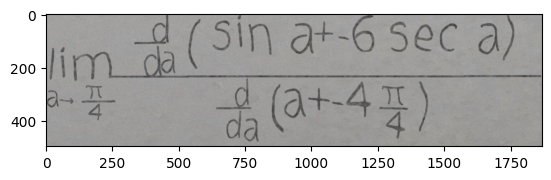

In [9]:
plt.imshow(image)

In [12]:
def load_single_data(ind):
  path = info['uuid'][ind] + '.jpg'
  img = load_img("/content/drive/MyDrive/Pitch/batch_1/background_images/" + path)
  img = np.array(img)
  return {"image":img, "categories": chars[ind], "bounding_boxes": bboxs[ind]}

In [13]:
data0 = load_single_data(0)

['\\lim_', 'a', '\\to', '\\frac', '\\pi', '4', '\\frac', '\\frac', 'd', 'd', 'a', '\\left(', '\\sin', 'a', '+', '-', '6', '\\sec', 'a', '\\right)', '\\frac', 'd', 'd', 'a', '\\left(', 'a', '+', '-', '4', '\\frac', '\\pi', '4', '\\right)']
[[14, 124, 233, 127], [3, 287, 44, 64], [51, 316, 52, 21], [134, 324, 127, 9], [149, 268, 61, 52], [160, 336, 50, 63], [245, 230, 1621, 9], [332, 103, 120, 10], [401, 1, 60, 106], [369, 118, 66, 114], [432, 140, 55, 84], [536, 17, 45, 188], [627, 2, 223, 151], [922, 34, 86, 116], [1010, 28, 71, 75], [1101, 84, 39, 12], [1155, 3, 82, 140], [1296, 29, 253, 113], [1629, 34, 78, 117], [1721, 3, 43, 171], [641, 350, 132, 8], [712, 242, 51, 107], [680, 365, 55, 103], [746, 392, 55, 88], [850, 263, 44, 184], [897, 280, 82, 111], [988, 278, 80, 85], [1077, 331, 44, 12], [1131, 254, 92, 133], [1255, 350, 109, 10], [1266, 270, 83, 73], [1279, 366, 72, 103], [1405, 254, 34, 188]]


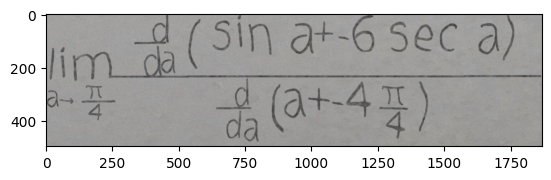

In [14]:
plt.imshow(data0['image'])
print(data0['categories'])
print(data0['bounding_boxes'])

In [15]:
info['latex'][0]

'\\lim_{a\\to\\frac{\\pi}{4}}\\frac{\\frac{d}{da}\\left(\\sin{a}+-6\\sec{a}\\right)}{\\frac{d}{da}\\left(a+-4\\frac{\\pi}{4}\\right)}'

$\lim_{a\to\frac{\pi}{4}}\frac{\frac{d}{da}\left(\sin{a}+-6\sec{a}\right)}{\frac{d}{da}\left(a+-4\frac{\pi}{4}\right)}$

In [16]:
info['uuid'][0]

'bd85ee85-2549-4539-9cd9-122d0ea3dca2'

In [17]:
  path = info['uuid'][0] + '.jpg'
  img = load_img("/content/drive/MyDrive/Pitch/batch_1/background_images/" + path)
  X = np.array(img)

In [18]:
y = [np.array(chars[0]), np.array(bboxs[0])]


In [22]:
inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)

In [30]:
image_batch = inference_resizing([X])

In [ ]:
test_dict = {"images": image_batchx,"bounding_boxes":{"classes": np.expand_dims(np.arange(0,len(chars[5])), axis=0) , "boxes": np.expand_dims(np.array(bboxs[5]), axis=0)}}

In [ ]:
def make_dict(img_list, classes_list, bbox_list):
  return {"images": img_list, "bounding_boxes": {"classes": classes_list, "boxes": bbox_list}}

In [ ]:
bboxs